In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Rreading train dataset
file_path = "../data/train.csv"
raw_data = pd.read_csv(file_path)
print("Data points count: ", raw_data['id'].count())
raw_data.head()


Data points count:  7613


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [10]:
data_1 = raw_data[raw_data["target"]==1]
data_1

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [11]:
data1 = data_1.sample(n=1080)
data1

,id,keyword,location,text,target
4749,6757,lightning,"Norman, Oklahoma",Couple storms near Guthrie OK. Leaving Norman ...,1
3891,5532,flattened,Leeds,Flattened thee striker,1
3651,5200,fatalities,USA,Las Vegas in top 5 cities for red-light runnin...,1
6058,8657,sinkhole,Above the snake line - #YoNews,Large sinkhole swallows entire pond in Lowndes...,1
7028,10073,typhoon,NaN,Obama Declares Disaster for Typhoon-Devastated...,1
...,...,...,...,...,...
2941,4227,drowned,Halfrica,So I pick myself off the ground and swam befor...,1
4553,6472,injured,World Wide Web,4 dead dozens injured in Gaza blast near house...,1
3799,5396,fire%20truck,NaN,when a monster truck racer catches on fire at ...,1
1774,2547,collision,"Denver, Colorado",Motorcyclist bicyclist injured in Denver colli...,1


In [12]:
data2 = raw_data[raw_data["target"]==0]
data2

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0
...,...,...,...,...,...
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's s...,0
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,0
7587,10841,NaN,NaN,Sirens everywhere!,0


In [13]:
# 드리프트 전 데이터
# 초기 실험 데이터 재난:20% 평시: 80%
# 1080개 4342개
train1 = pd.concat([data1, data2])
train1 = train1.sample(n=5422)
train1

,id,keyword,location,text,target
2046,2936,danger,Atlanta Georgia,@nuggets #FETTILOOTCH IS #SLANGLUCCI OPPRESSIO...,0
7005,10042,twister,Galapa / AtlÌÁntico,You are listening to LLEGASTE TU - TWISTER EL REY,0
3718,5286,fear,NaN,@shakjn @C7 @Magnums im shaking in fear he's g...,0
4960,7070,meltdown,NaN,Why must I have a meltdown every few days? ??,0
176,252,ambulance,West Wales,Anyone travelling Aberystwyth-Shrewsbury right...,1
...,...,...,...,...,...
1849,2659,crush,EastAtlanta ??#WestGeorgia'18,WCE I can't even lie even tho I can't stand he...,0
2132,3060,deaths,"Voorhees, NJ",1/2 of the deaths in red-light running crashes...,1
6093,8700,sinking,NaN,@abandonedpics You should delete this one it's...,0
1806,2594,crash,NaN,I see dat we liable to fuck up and crash ????,0


Text(0.5, 0.98, 'Target Value Counts')

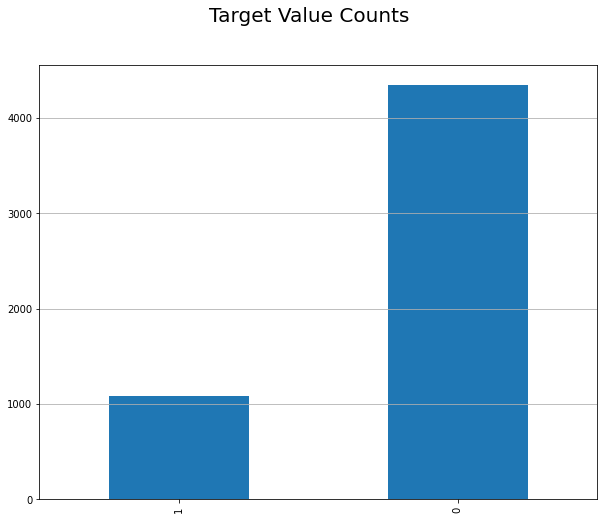

In [14]:
# Plotting target value counts
plt.figure(figsize=(10,8))
ax = train1['target'].value_counts().sort_values().plot(kind="bar")
ax.grid(axis="y")
plt.suptitle("Target Value Counts", fontsize=20)
# plt.show()

In [7]:
train1.to_csv('../data/before_train.csv', index=False)